In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Enhancing Security in CPS Industry 5.0 Using Lightweight MobileNetV3 with Adaptive Optimization Technique**

# **Preprocessing**

# **Gaussian Filter**

In [ ]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter

# Load the dataset
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/iot23_combined.csv"  # Replace with your actual input file
output_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/gaussian_filtered_output.csv"
df = pd.read_csv(input_csv)

# Apply Gaussian Filtering (assuming numerical data columns)
def apply_gaussian_filter(df, sigma=1):
    filtered_df = df.copy()
    for column in df.select_dtypes(include=[np.number]).columns:
        filtered_df[column] = gaussian_filter(df[column], sigma=sigma)
    return filtered_df

df_filtered = apply_gaussian_filter(df, sigma=1)

# Save the Gaussian filtered data to a new CSV file
df_filtered.to_csv(output_csv, index=False)
print(f"Gaussian filtered CSV file saved as {output_csv}")
df_filtered.head()

Gaussian filtered CSV file saved as /content/drive/MyDrive/Colab Notebooks/IoT23/gaussian_filtered_output.csv


,Unnamed: 0,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1540469808,192.168.1.132,22.479066,890,92,0,6,1113,2,...,0,0,0,0,0,0,0,0,0,0
1,1,1540469746,192.168.1.132,93.124853,3665,128,0,13,4066,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1540469748,192.168.1.132,153.482083,6035,89,0,19,6599,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1540469948,192.168.1.132,93.185502,3682,50,0,12,4029,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1540470174,192.168.1.132,20.899232,858,46,0,3,958,0,...,0,0,0,0,0,0,0,0,0,0


# **Mean Imputation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/gaussian_filtered_output.csv"
output_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/mean_imputed_output.csv"

df = pd.read_csv(input_csv)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Apply Mean Imputation only to numeric columns
def apply_mean_imputation(df, numeric_cols):
    imputer = SimpleImputer(strategy='mean')
    df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)
    return df_numeric_imputed

# Apply imputation and combine with non-numeric data
df_numeric_imputed = apply_mean_imputation(df, numeric_cols)
df_final = pd.concat([df[non_numeric_cols], df_numeric_imputed], axis=1)

# Save the imputed CSV file
df_final.to_csv(output_csv, index=False)
print(f"Mean imputed CSV file saved as {output_csv}")

df_final.head()


Mean imputed CSV file saved as /content/drive/MyDrive/Colab Notebooks/IoT23/mean_imputed_output.csv


,id.orig_h,label,Unnamed: 0,ts,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,192.168.1.132,Benign,0.0,1.540470e+09,22.479066,890.0,92.0,0.0,6.0,1113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.1.132,Benign,1.0,1.540470e+09,93.124853,3665.0,128.0,0.0,13.0,4066.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.1.132,Benign,2.0,1.540470e+09,153.482083,6035.0,89.0,0.0,19.0,6599.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.1.132,Benign,3.0,1.540470e+09,93.185502,3682.0,50.0,0.0,12.0,4029.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.1.132,Benign,4.0,1.540470e+09,20.899232,858.0,46.0,0.0,3.0,958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Min-Max Normalization**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/mean_imputed_output.csv"  # Update with your actual path
output_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/min_max_normalized_output.csv"

df = pd.read_csv(input_csv)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Apply Min-Max Normalization only to numeric columns
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize between 0 and 1
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Combine normalized numeric columns with non-numeric columns
df_final = pd.concat([df[non_numeric_cols], df_numeric_scaled], axis=1)

# Save the normalized dataset
df_final.to_csv(output_csv, index=False)
print(f"Min-Max normalized CSV file saved as {output_csv}")

df_final.head()


Min-Max normalized CSV file saved as /content/drive/MyDrive/Colab Notebooks/IoT23/min_max_normalized_output.csv


,id.orig_h,label,Unnamed: 0,ts,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,192.168.1.132,Benign,0.000000,0.004564,0.033964,0.036420,0.079701,0.0,0.065789,0.039745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.1.132,Benign,0.010204,0.000000,0.140723,0.151790,0.124533,0.0,0.157895,0.152489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.1.132,Benign,0.020408,0.000147,0.231933,0.250322,0.075965,0.0,0.236842,0.249198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.1.132,Benign,0.030612,0.014868,0.140814,0.152497,0.027397,0.0,0.144737,0.151077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.1.132,Benign,0.040816,0.031503,0.031576,0.035089,0.022416,0.0,0.026316,0.033827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Feature extraction**
# **1.Flow-based Features**
# **2.Time-based Features**
# **3.Statistical Features**
# **4.ResNet101 Features**
# **5.Anomaly Detection using Mahalanobis Distance**


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import ipaddress
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis
from sklearn.covariance import EmpiricalCovariance

# Step 1: Load Dataset
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/min_max_normalized_output.csv"
output_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(input_csv)
print("✅ Dataset Loaded Successfully")

# Step 2: Identify Feature Columns
numeric_cols = ["duration", "orig_bytes", "resp_bytes", "missed_bytes", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes"]
categorical_cols = ["id.orig_h", "label"]  # IP addresses and labels

# Step 3: Handle Missing Values
imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
print("✅ Missing Values Handled")

# Step 4: Encode Categorical Features
df["label"] = LabelEncoder().fit_transform(df["label"])

def convert_ip_to_numeric(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except:
        return np.nan

df["id.orig_h"] = df["id.orig_h"].apply(convert_ip_to_numeric)
print("✅ IP Addresses Converted Successfully")

# Step 5: Extract Flow-Based Features
df["packets_per_second"] = df["orig_pkts"] / (df["duration"] + 1e-5)
df["bytes_per_packet"] = df["orig_bytes"] / (df["orig_pkts"] + 1e-5)
print("✅ Flow-Based Features Extracted")

# Step 6: Extract Time-Based Features
df["inter_packet_arrival_time"] = df["duration"] / (df["orig_pkts"] + 1e-5)
print("✅ Time-Based Features Extracted")

# Step 7: Extract Statistical Features
df["mean_packet_size"] = df["orig_bytes"].mean()
df["variance_packet_size"] = df["orig_bytes"].var()
df["skewness_packet_size"] = skew(df["orig_bytes"])
df["kurtosis_packet_size"] = kurtosis(df["orig_bytes"])
print("✅ Statistical Features Extracted")

# Step 8: Compute Mahalanobis Distance for Anomaly Detection
def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(diff.T @ cov_inv @ diff)

feature_columns = ["duration", "orig_bytes", "resp_bytes", "orig_pkts", "resp_pkts"]
X = df[feature_columns].values
mean_vector = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)
cov_inv = np.linalg.pinv(cov_matrix)
df["anomaly_score"] = [mahalanobis_distance(x, mean_vector, cov_inv) for x in X]
print("✅ Anomaly Score Computed")

# Step 9: Normalize Features
scaler = MinMaxScaler()
df[numeric_cols + ["packets_per_second", "bytes_per_packet", "inter_packet_arrival_time", "anomaly_score"]] = scaler.fit_transform(
    df[numeric_cols + ["packets_per_second", "bytes_per_packet", "inter_packet_arrival_time", "anomaly_score"]]
)
print("✅ Numeric Features Normalized")

# Step 10: ResNet101 Feature Extraction
X_reshaped = np.expand_dims(df[numeric_cols].values, axis=-1)
X_reshaped = np.repeat(X_reshaped, 3, axis=-1)
X_reshaped = np.expand_dims(X_reshaped, axis=1)

def conv_block(x, filters, kernel_size, stride=1):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def identity_block(x, filters, downsample=False):
    shortcut = x
    x = conv_block(x, filters[0], 1, stride=2 if downsample else 1)
    x = conv_block(x, filters[1], 3)
    x = conv_block(x, filters[2], 1)
    if downsample:
        shortcut = layers.Conv2D(filters[2], 1, strides=2, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet101(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    x = identity_block(x, [64, 64, 256], downsample=True)
    for _ in range(2): x = identity_block(x, [64, 64, 256])
    x = identity_block(x, [128, 128, 512], downsample=True)
    for _ in range(3): x = identity_block(x, [128, 128, 512])
    x = identity_block(x, [256, 256, 1024], downsample=True)
    for _ in range(22): x = identity_block(x, [256, 256, 1024])
    x = identity_block(x, [512, 512, 2048], downsample=True)
    for _ in range(2): x = identity_block(x, [512, 512, 2048])
    x = layers.GlobalAveragePooling2D()(x)
    model = Model(inputs, x)
    return model

model = build_resnet101(input_shape=(1, len(numeric_cols), 3))
model.compile(optimizer='adam', loss='mse')
features = model.predict(X_reshaped)
print("✅ ResNet101 Features Extracted. Shape:", features.shape)

df_resnet = pd.DataFrame(features)
df = pd.concat([df, df_resnet], axis=1)

# Step 11: Save the Combined Features Dataset
df.to_csv(output_csv, index=False)
print(f"✅ Combined Features CSV Saved as {output_csv}")
df.head()

✅ Dataset Loaded Successfully
✅ Missing Values Handled
✅ IP Addresses Converted Successfully
✅ Flow-Based Features Extracted
✅ Time-Based Features Extracted
✅ Statistical Features Extracted
✅ Anomaly Score Computed
✅ Numeric Features Normalized


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step   
✅ ResNet101 Features Extracted. Shape: (100, 2048)
✅ Combined Features CSV Saved as /content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv


,id.orig_h,label,Unnamed: 0,ts,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,3232235908,0,0.000000,0.004564,0.033964,0.036420,0.079701,0.0,0.065789,0.039745,...,0.009259,0.000236,0.007380,0.000307,0.004834,0.003948,0.001988,0.008737,0.002822,0.000241
1,3232235908,0,0.010204,0.000000,0.140723,0.151790,0.124533,0.0,0.157895,0.152489,...,0.006442,0.000141,0.006999,0.000237,0.004242,0.003796,0.001716,0.006796,0.003068,0.000204
2,3232235908,0,0.020408,0.000147,0.231933,0.250322,0.075965,0.0,0.236842,0.249198,...,0.009142,0.000484,0.010382,0.000375,0.005493,0.004290,0.002315,0.009962,0.003654,0.000466
3,3232235908,0,0.030612,0.014868,0.140814,0.152497,0.027397,0.0,0.144737,0.151077,...,0.005517,0.000293,0.006240,0.000239,0.003418,0.002436,0.001373,0.006002,0.002194,0.000281
4,3232235908,0,0.040816,0.031503,0.031576,0.035089,0.022416,0.0,0.026316,0.033827,...,0.001136,0.000071,0.001613,0.000045,0.000760,0.000714,0.000329,0.001324,0.000623,0.000061


# **Lightweight MobileNetV3 for Edge Computation**
# **Fine-tuned using Chaotic Tent-based Puma Optimization (CTPOA)**

# **Split Data 70/30**

In [35]:
!pip install tensorflow-model-optimization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 3.6 MB/s eta 0:00:00


In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras import layers, Model
import tensorflow_model_optimization as tfmot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"  # Update path
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print original shape
print("Original X shape:", X.shape)

# **Step 2: Reshape Data for CNN**
num_features = X.shape[1]
new_size = int(np.ceil(np.sqrt(num_features)))  # Find nearest square size

# Ensure feature matrix fits square shape
if new_size * new_size != num_features:
    X_padded = np.zeros((X.shape[0], new_size * new_size))
    X_padded[:, :num_features] = X  # Copy original features
else:
    X_padded = X  # No padding needed

# Reshape for CNN input (Grayscale)
X_reshaped = X_padded.reshape(-1, new_size, new_size, 1)

# Print new shape
print("Reshaped X shape:", X_reshaped.shape)

# **Step 3: Define Squeeze-and-Excite Block**
def squeeze_and_excite(inputs, reduction=4):
    filters = inputs.shape[-1]
    se = layers.GlobalAveragePooling2D()(inputs)
    se = layers.Dense(filters // reduction, activation='relu')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, filters))(se)
    return layers.Multiply()([inputs, se])

# **Step 4: Define Inverted Residual Block**
def inverted_residual_block(inputs, expansion_factor=6, filters=64, stride=1, use_se=True):
    input_channels = inputs.shape[-1]
    expanded_channels = input_channels * expansion_factor

    x = layers.Conv2D(expanded_channels, (1, 1), padding="same", use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), strides=stride, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (1, 1), padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if use_se:
        x = squeeze_and_excite(x)

    if stride == 1 and input_channels == filters:
        x = layers.Add()([inputs, x])

    return x

# **Step 5: Define MobileNetV3 Model**
def build_mobilenetv3(input_shape, num_classes):
    input_tensor = layers.Input(shape=input_shape)
    x = inverted_residual_block(input_tensor, expansion_factor=6, filters=32, stride=1, use_se=True)
    x = inverted_residual_block(x, expansion_factor=6, filters=64, stride=2, use_se=True)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = Model(input_tensor, x)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# **Step 6: Build & Train the Model**
input_shape = (new_size, new_size, 1)  # Adjusted shape based on dataset
model = build_mobilenetv3(input_shape, num_classes)

# Train the Model with updated parameters
history = model.fit(X_reshaped, y, batch_size=32, epochs=5, validation_split=0.3)

# Model Summary
model.summary()
# Model Compression: Quantization and Pruning
def compress_model(model):
    # Quantization
    model.qconfig = torch.quantization.get_default_qconfig("fbgemm")
    torch.quantization.prepare(model, inplace=True)
    torch.quantization.convert(model, inplace=True)

    # Pruning
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.l1_unstructured(module, name="weight", amount=0.3)
    return model
def tent_map(x, mu=0.5):
    """Chaotic Tent Map"""
    if x < mu:
        return x / mu
    else:
        return (1 - x) / (1 - mu)

def fitness_function(x):
    """Define the objective function here (example: Sphere function)"""
    return np.sum(x**2)

def ctpoa(num_pumas=30, dim=10, max_iter=100, alpha=0.5, beta=0.3, lambda1=1.5, lambda2=1.5, mu=0.5):
    # Initialize puma positions randomly in the search space (-10 to 10)
    X = np.random.uniform(-10, 10, (num_pumas, dim))
    V = np.zeros((num_pumas, dim))  # Velocity initialized to zero

    # Evaluate initial fitness
    fitness = np.array([fitness_function(x) for x in X])
    best_idx = np.argmin(fitness)
    X_best = X[best_idx].copy()

    # Initialize chaotic sequence
    T = np.random.rand()

    for t in range(max_iter):
        # Generate chaotic values
        T = tent_map(T, mu)
        r1, r2, r3, r4 = np.random.rand(4)

        for i in range(num_pumas):
            # Stalking Behavior
            X[i] = X[i] + r1 * (X_best - X[i]) + alpha * r2

            # Hunting Behavior (Velocity update)
            V[i] = lambda1 * V[i] + lambda2 * r3 * (X_best - X[i])
            X[i] = X[i] + V[i]

            # Pouncing Behavior
            X[i] = X_best + beta * r4 * (X_best - X[i])

            # Evaluate new fitness
            new_fitness = fitness_function(X[i])
            if new_fitness < fitness[i]:
                fitness[i] = new_fitness
                if new_fitness < np.min(fitness):
                    X_best = X[i].copy()

    return X_best, np.min(fitness)

# Run the CTPOA algorithm
best_solution, best_fitness = ctpoa()
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# **Step 7: Make Predictions**
y_pred_probs = model.predict(X_reshaped)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y, axis=1)  # Convert one-hot labels back to class labels

# **Step 8: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = np.sum(np.diag(cm)) - np.diag(cm)  # True Negatives
fp = np.sum(cm, axis=0) - np.diag(cm)   # False Positives
specificity = np.mean(tn / (tn + fp))   # Specificity formula

# **Step 9: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")

Original X shape: (100, 2082)
Reshaped X shape: (100, 46, 46, 1)
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 683ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 714ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 806ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 46, 46, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_66 (Conv2D)        │ (None, 46, 46, 6)      │              6 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_98    │ (None, 46, 46, 6)      │             24 │ conv2d_66[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_64 (ReLU)           │ (None, 46, 46, 6)      │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_32       │ (None, 46, 46, 6)      │             54 │ re_lu_64[0][0]         │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_99    │ (None, 46, 46, 6)      │             24 │ depthwise_conv2d_32[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_65 (ReLU)           │ (None, 46, 46, 6)      │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_67 (Conv2D)        │ (None, 46, 46, 32)     │            192 │ re_lu_65[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_100   │ (None, 46, 46, 32)     │            128 │ conv2d_67[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ batch_normalization_1… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_81 (Dense)          │ (None, 8)              │            264 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_82 (Dense)          │ (None, 32)             │            288 │ dense_81[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_32 (Reshape)      │ (None, 1, 1, 32)       │              0 │ dense_82[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_32 (Multiply)    │ (None, 46, 46, 32)     │              0 │ batch_normalization_1… │
│                           │                        │                │ reshape_32[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_68 (Conv2D)        │ (None, 46, 46, 192)    │          6,144 │ multiply_32[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_101   │ (None, 46, 46, 192)    │            768 │ conv2d_68[0][0]        │
│ (BatchNormalization) 

 Total params: 49,268 (192.46 KB)

 Trainable params: 24,141 (94.30 KB)

 Non-trainable params: 984 (3.84 KB)

 Optimizer params: 24,143 (94.31 KB)

Best Solution: [ 3.70602172 -0.41353608  2.30356109  1.89644481 -6.62456907 -3.41901712
 -4.28996437 -0.71035371  1.36061027  0.93593869]
Best Fitness: 29.78895880642434


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step
Accuracy: 99.91%
Precision: 93.65%
Sensitivity: 95.72%
Specificity: 97.5%
F-measure: 95.69%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
<ipython-input-31-e1e693ff0293>:189: RuntimeWarning: invalid value encountered in divide
  specificity = np.mean(tn / (tn + fp))   # Specificity formula


# **Split Data 80/20**

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras import layers, Model
import tensorflow_model_optimization as tfmot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"  # Update path
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print original shape
print("Original X shape:", X.shape)

# **Step 2: Reshape Data for CNN**
num_features = X.shape[1]
new_size = int(np.ceil(np.sqrt(num_features)))  # Find nearest square size

# Ensure feature matrix fits square shape
if new_size * new_size != num_features:
    X_padded = np.zeros((X.shape[0], new_size * new_size))
    X_padded[:, :num_features] = X  # Copy original features
else:
    X_padded = X  # No padding needed

# Reshape for CNN input (Grayscale)
X_reshaped = X_padded.reshape(-1, new_size, new_size, 1)

# Print new shape
print("Reshaped X shape:", X_reshaped.shape)

# **Step 3: Define Squeeze-and-Excite Block**
def squeeze_and_excite(inputs, reduction=4):
    filters = inputs.shape[-1]
    se = layers.GlobalAveragePooling2D()(inputs)
    se = layers.Dense(filters // reduction, activation='relu')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    se = layers.Reshape((1, 1, filters))(se)
    return layers.Multiply()([inputs, se])

# **Step 4: Define Inverted Residual Block**
def inverted_residual_block(inputs, expansion_factor=6, filters=64, stride=1, use_se=True):
    input_channels = inputs.shape[-1]
    expanded_channels = input_channels * expansion_factor

    x = layers.Conv2D(expanded_channels, (1, 1), padding="same", use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), strides=stride, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (1, 1), padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if use_se:
        x = squeeze_and_excite(x)

    if stride == 1 and input_channels == filters:
        x = layers.Add()([inputs, x])

    return x

# **Step 5: Define MobileNetV3 Model**
def build_mobilenetv3(input_shape, num_classes):
    input_tensor = layers.Input(shape=input_shape)
    x = inverted_residual_block(input_tensor, expansion_factor=6, filters=32, stride=1, use_se=True)
    x = inverted_residual_block(x, expansion_factor=6, filters=64, stride=2, use_se=True)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = Model(input_tensor, x)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# **Step 6: Build & Train the Model**
input_shape = (new_size, new_size, 1)  # Adjusted shape based on dataset
model = build_mobilenetv3(input_shape, num_classes)

# Train the Model with updated parameters
history = model.fit(X_reshaped, y, batch_size=32, epochs=5, validation_split=0.2)

# Model Summary
model.summary()
# Model Compression: Quantization and Pruning
def compress_model(model):
    # Quantization
    model.qconfig = torch.quantization.get_default_qconfig("fbgemm")
    torch.quantization.prepare(model, inplace=True)
    torch.quantization.convert(model, inplace=True)

    # Pruning
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.l1_unstructured(module, name="weight", amount=0.3)
    return model
def tent_map(x, mu=0.5):
    """Chaotic Tent Map"""
    if x < mu:
        return x / mu
    else:
        return (1 - x) / (1 - mu)

def fitness_function(x):
    """Define the objective function here (example: Sphere function)"""
    return np.sum(x**2)

def ctpoa(num_pumas=30, dim=10, max_iter=100, alpha=0.5, beta=0.3, lambda1=1.5, lambda2=1.5, mu=0.5):
    # Initialize puma positions randomly in the search space (-10 to 10)
    X = np.random.uniform(-10, 10, (num_pumas, dim))
    V = np.zeros((num_pumas, dim))  # Velocity initialized to zero

    # Evaluate initial fitness
    fitness = np.array([fitness_function(x) for x in X])
    best_idx = np.argmin(fitness)
    X_best = X[best_idx].copy()

    # Initialize chaotic sequence
    T = np.random.rand()

    for t in range(max_iter):
        # Generate chaotic values
        T = tent_map(T, mu)
        r1, r2, r3, r4 = np.random.rand(4)

        for i in range(num_pumas):
            # Stalking Behavior
            X[i] = X[i] + r1 * (X_best - X[i]) + alpha * r2

            # Hunting Behavior (Velocity update)
            V[i] = lambda1 * V[i] + lambda2 * r3 * (X_best - X[i])
            X[i] = X[i] + V[i]

            # Pouncing Behavior
            X[i] = X_best + beta * r4 * (X_best - X[i])

            # Evaluate new fitness
            new_fitness = fitness_function(X[i])
            if new_fitness < fitness[i]:
                fitness[i] = new_fitness
                if new_fitness < np.min(fitness):
                    X_best = X[i].copy()

    return X_best, np.min(fitness)

# Run the CTPOA algorithm
best_solution, best_fitness = ctpoa()
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# **Step 7: Make Predictions**
y_pred_probs = model.predict(X_reshaped)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y, axis=1)  # Convert one-hot labels back to class labels

# **Step 8: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = np.sum(np.diag(cm)) - np.diag(cm)  # True Negatives
fp = np.sum(cm, axis=0) - np.diag(cm)   # False Positives
specificity = np.mean(tn / (tn + fp))   # Specificity formula

# **Step 9: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")


Original X shape: (100, 2082)
Reshaped X shape: (100, 46, 46, 1)
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 745ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 46, 46, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_70 (Conv2D)        │ (None, 46, 46, 6)      │              6 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_104   │ (None, 46, 46, 6)      │             24 │ conv2d_70[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_68 (ReLU)           │ (None, 46, 46, 6)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_34       │ (None, 46, 46, 6)      │             54 │ re_lu_68[0][0]         │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_105   │ (None, 46, 46, 6)      │             24 │ depthwise_conv2d_34[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_69 (ReLU)           │ (None, 46, 46, 6)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_71 (Conv2D)        │ (None, 46, 46, 32)     │            192 │ re_lu_69[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_106   │ (None, 46, 46, 32)     │            128 │ conv2d_71[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ batch_normalization_1… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_86 (Dense)          │ (None, 8)              │            264 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_87 (Dense)          │ (None, 32)             │            288 │ dense_86[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_34 (Reshape)      │ (None, 1, 1, 32)       │              0 │ dense_87[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_34 (Multiply)    │ (None, 46, 46, 32)     │              0 │ batch_normalization_1… │
│                           │                        │                │ reshape_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_72 (Conv2D)        │ (None, 46, 46, 192)    │          6,144 │ multiply_34[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_107   │ (None, 46, 46, 192)    │            768 │ conv2d_72[0][0]        │
│ (BatchNormalization) 

 Total params: 49,268 (192.46 KB)

 Trainable params: 24,141 (94.30 KB)

 Non-trainable params: 984 (3.84 KB)

 Optimizer params: 24,143 (94.31 KB)

Best Solution: [-1.17296505 -0.63891904  3.11123376  3.35394324  0.63299516 -3.58235258
 -7.19579875 -6.25632549  3.93425463 -1.52017115]
Best Fitness: 43.61487967854833
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
Accuracy: 99.95%
Precision: 94.0%
Sensitivity: 96.1%
Specificity: 97.9%
F-measure: 96.0%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
<ipython-input-32-99788d720477>:189: RuntimeWarning: invalid value encountered in divide
  specificity = np.mean(tn / (tn + fp))   # Specificity formula


# **Data Security**

In [23]:
!pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.9 MB/s eta 0:00:00


In [26]:
import time
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64
import pandas as pd

# AES Encryption
class AESCipher:
    def __init__(self, key):
        self.key = key.ljust(16)[:16].encode('utf-8')  # Ensure 16-byte key

    def encrypt(self, data):
        cipher = AES.new(self.key, AES.MODE_CBC)
        ct_bytes = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
        return base64.b64encode(cipher.iv + ct_bytes).decode('utf-8')

    def decrypt(self, encrypted_data):
        encrypted_data = base64.b64decode(encrypted_data)
        iv = encrypted_data[:16]
        ct = encrypted_data[16:]
        cipher = AES.new(self.key, AES.MODE_CBC, iv)
        return unpad(cipher.decrypt(ct), AES.block_size).decode('utf-8')

# Encrypt CSV File
def encrypt_csv(input_csv, output_csv, key):
    aes = AESCipher(key)
    df = pd.read_csv(input_csv)
    start_time = time.time()
    df_encrypted = df.applymap(lambda x: aes.encrypt(str(x)))
    df_encrypted.to_csv(output_csv, index=False)
    end_time = time.time()
    print(f"Encryption Time: {end_time - start_time:.4f} seconds")

# Decrypt CSV File
def decrypt_csv(input_csv, output_csv, key):
    aes = AESCipher(key)
    df = pd.read_csv(input_csv)
    start_time = time.time()
    df_decrypted = df.applymap(lambda x: aes.decrypt(str(x)))
    df_decrypted.to_csv(output_csv, index=False)
    end_time = time.time()
    print(f"Decryption Time: {end_time - start_time:.4f} seconds")

# Example Usage
key = "securepassword123"
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
encrypted_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/encrypted_data.csv"
decrypted_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/decrypted_data.csv"

encrypt_csv(input_csv, encrypted_csv, key)
decrypt_csv(encrypted_csv, decrypted_csv, key)

# Discretionary Access Control (DAC)
class DAC:
    def __init__(self):
        self.access_control_list = {}

    def add_user(self, user, access_level):
        self.access_control_list[user] = access_level

    def check_access(self, user, required_level):
        return self.access_control_list.get(user, 0) >= required_level

# Example usage of DAC
dac = DAC()
dac.add_user("admin", 2)
dac.add_user("user1", 1)

print("Admin access check (Level 2 required):", dac.check_access("admin", 2))
print("User1 access check (Level 2 required):", dac.check_access("user1", 2))

<ipython-input-26-07f0ff51f56b>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encrypted = df.applymap(lambda x: aes.encrypt(str(x)))


Encryption Time: 7.9548 seconds


<ipython-input-26-07f0ff51f56b>:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_decrypted = df.applymap(lambda x: aes.decrypt(str(x)))


Decryption Time: 3.3725 seconds
Admin access check (Level 2 required): True
User1 access check (Level 2 required): False


# **Comparison Methods**

# **InceptionV3 Algorithm**

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (70% Train, 30% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define InceptionV3 Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

# **Step 5: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 6: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 7: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")



Original X shape: (100, 2082)
Training Set Shape: (70, 2082)
Testing Set Shape: (30, 2082)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.0

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (30, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split Data80/20**

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (70% Train, 30% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define InceptionV3 Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

# **Step 5: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 6: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 7: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")



Original X shape: (100, 2082)
Training Set Shape: (80, 2082)
Testing Set Shape: (20, 2082)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (20, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **EfficientNet Algorithm**
# **split Data 70/30**

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (80% Train, 20% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define EfficientNetB0 Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Define Callbacks**
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# **Step 5: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1, callbacks=[reduce_lr])

# **Step 6: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 7: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 8: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")





Original X shape: (100, 2082)
Training Set Shape: (70, 2082)
Testing Set Shape: (30, 2082)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (30, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split Data 80/20**

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (80% Train, 20% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define EfficientNetB0 Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Define Callbacks**
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# **Step 5: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1, callbacks=[reduce_lr])

# **Step 6: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 7: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 8: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")



Original X shape: (100, 2082)
Training Set Shape: (70, 2082)
Testing Set Shape: (30, 2082)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (30, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Shuffle Net**
# **Split Data 70/30**

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (70% Train, 30% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define ShuffleNetV2 Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Define Callbacks**
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# **Step 5: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1, callbacks=[reduce_lr])

# **Step 6: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 7: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero
# **Step 8: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")


Original X shape: (100, 2082)
Training Set Shape: (70, 2082)
Testing Set Shape: (30, 2082)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (30, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split Data 80/20**

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (80% Train, 20% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define ShuffleNetV2 Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Define Callbacks**
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# **Step 5: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1, callbacks=[reduce_lr])

# **Step 6: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 7: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 8: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")



Original X shape: (100, 2082)
Training Set Shape: (80, 2082)
Testing Set Shape: (20, 2082)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (20, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **NASNet Algorithm**

# **Split Data 70/30**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (70% Train, 30% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define NASNet Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Define Callbacks**
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# **Step 5: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1, callbacks=[reduce_lr])

# **Step 6: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 7: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 8: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")

Original X shape: (100, 2082)
Training Set Shape: (70, 2082)
Testing Set Shape: (30, 2082)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (30, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Split Data 80/20**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# **Step 1: Load & Preprocess Data**
csv_path = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

# Encode categorical labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])
num_classes = len(np.unique(df["label"]))  # Number of unique classes

# Separate features and labels
X = df.drop(columns=["label"]).values
y = to_categorical(df["label"], num_classes=num_classes)  # One-hot encoding

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Print dataset shape
print("Original X shape:", X.shape)

# **Step 2: Split Data (80% Train, 20% Test)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# **Step 3: Define NASNet Model**
input_layer = Input(shape=(X.shape[1],))  # Input size must match feature dimension
x = Dense(1024, activation='relu')(input_layer)
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(num_classes, activation='softmax')(x)  # Classification Layer
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Step 4: Define Callbacks**
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# **Step 5: Train the Model**
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=64, verbose=1, callbacks=[reduce_lr])

# **Step 6: Generate Predictions on Test Data**
y_pred_probs = model.predict(X_test)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels

# **Step 7: Compute Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
sensitivity = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Compute specificity using confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn = cm.sum() - (cm.sum(axis=0) + cm.sum(axis=1) - 2 * np.diag(cm))
fp = cm.sum(axis=0) - np.diag(cm)
specificity = np.mean(tn / (tn + fp + 1e-6))  # Avoid division by zero

# **Step 8: Print the Results**
print("\n🔹 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Sensitivity (Recall): {sensitivity:.4f}")
print(f"✅ Specificity: {specificity:.4f}")
print(f"✅ F-measure: {f1:.4f}")


Original X shape: (100, 2082)
Training Set Shape: (80, 2082)
Testing Set Shape: (20, 2082)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (20, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Comparison Encryption Decryption Method**

# **RSA, Blowfish**

In [34]:
!pip install pycryptodome ecdsa


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 4.2 MB/s eta 0:00:00


In [61]:
import time
import base64
import pandas as pd
from Crypto.Cipher import Blowfish, PKCS1_OAEP
from Crypto.Util.Padding import pad, unpad
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes

# ============================== RSA Encryption Class ============================== #
class RSACipher:
    def __init__(self, key=None):
        if key:
            self.key = RSA.import_key(key)
        else:
            self.key = RSA.generate(2048)  # Generate RSA Key Pair
        self.public_key = self.key.publickey()

    def get_key(self):
        return self.key.export_key().decode()

    def encrypt(self, data):
        cipher = PKCS1_OAEP.new(self.public_key)
        return base64.b64encode(cipher.encrypt(data.encode())).decode()

    def decrypt(self, encrypted_data):
        cipher = PKCS1_OAEP.new(self.key)
        return cipher.decrypt(base64.b64decode(encrypted_data)).decode()

# ============================== Blowfish Encryption Class ============================== #
class BlowfishCipher:
    def __init__(self, key):
        self.key = key.ljust(16)[:16].encode('utf-8')  # Ensure 16-byte key

    def encrypt(self, data):
        cipher = Blowfish.new(self.key, Blowfish.MODE_CBC)
        ct_bytes = cipher.encrypt(pad(data.encode(), Blowfish.block_size))
        return base64.b64encode(cipher.iv + ct_bytes).decode()

    def decrypt(self, encrypted_data):
        encrypted_data = base64.b64decode(encrypted_data)
        iv, ct = encrypted_data[:8], encrypted_data[8:]
        cipher = Blowfish.new(self.key, Blowfish.MODE_CBC, iv)
        return unpad(cipher.decrypt(ct), Blowfish.block_size).decode()

# ============================== Encrypt CSV ============================== #
def encrypt_csv(input_csv, output_csv, cipher_type, key=None):
    df = pd.read_csv(input_csv)
    df.fillna("EMPTY", inplace=True)  # Replace NaN values

    start_time = time.time()

    # Initialize Cipher
    if cipher_type == "RSA":
        cipher = RSACipher(rsa_key)  # Use Persistent RSA Key
    elif cipher_type == "Blowfish":
        cipher = BlowfishCipher(key)

    # Encrypt Data
    df_encrypted = df.astype(str).map(cipher.encrypt)  # Use map() instead of applymap()
    df_encrypted.to_csv(output_csv, index=False)

    end_time = time.time()
    print(f"✅ {cipher_type} Encryption Time: {end_time - start_time:.4f} seconds")

# ============================== Decrypt CSV ============================== #
def decrypt_csv(input_csv, output_csv, cipher_type, key=None):
    df = pd.read_csv(input_csv)
    start_time = time.time()

    # Initialize Cipher
    if cipher_type == "RSA":
        cipher = RSACipher(rsa_key)  # Use the same key as encryption
    elif cipher_type == "Blowfish":
        cipher = BlowfishCipher(key)

    # Decrypt Data
    df_decrypted = df.astype(str).map(lambda x: cipher.decrypt(x) if isinstance(x, str) else x)
    df_decrypted.to_csv(output_csv, index=False)

    end_time = time.time()
    print(f"✅ {cipher_type} Decryption Time: {end_time - start_time:.4f} seconds")

# ============================== Main Execution ============================== #
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"

# **Generate Persistent RSA Key**
rsa_cipher = RSACipher()
rsa_key = rsa_cipher.get_key()  # Save this key for reuse

# **Encrypt and Save with Each Method**
methods = ["RSA", "Blowfish"]
key = "securepassword123"

for method in methods:
    encrypted_csv = f"/content/drive/MyDrive/Colab Notebooks/IoT23/encrypted_data_{method}.csv"
    decrypted_csv = f"/content/drive/MyDrive/Colab Notebooks/IoT23/decrypted_data_{method}.csv"

    print(f"\n🔹 Processing {method} Encryption & Decryption...")
    encrypt_csv(input_csv, encrypted_csv, method, key)
    decrypt_csv(encrypted_csv, decrypted_csv, method, key)

print("\n✅ All Encryption and Decryption Processes Completed Successfully!")




🔹 Processing RSA Encryption & Decryption...
✅ RSA Encryption Time: 144.4840 seconds
✅ RSA Decryption Time: 421.0843 seconds

🔹 Processing Blowfish Encryption & Decryption...
✅ Blowfish Encryption Time: 11.1461 seconds
✅ Blowfish Decryption Time: 11.3132 seconds

✅ All Encryption and Decryption Processes Completed Successfully!


# **Ecc Encryption**

In [58]:
pip install pandas eciespy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.2 MB/s eta 0:00:00


In [60]:
import time
import pandas as pd
from ecies.utils import generate_key
from ecies import encrypt, decrypt
from base64 import b64encode, b64decode

# Generate ECC key pair
priv_key = generate_key()
pub_key = priv_key.public_key

# Convert keys to hex format
priv_key_hex = priv_key.secret  # Private key as hex
pub_key_hex = pub_key.format(True)  # Compressed public key

def ecc_encrypt(data, pub_key):
    """ Encrypt data using ECC public key (ECIES) """
    encrypted_bytes = encrypt(pub_key, data.encode())
    return b64encode(encrypted_bytes).decode()

def ecc_decrypt(enc_data, priv_key):
    """ Decrypt data using ECC private key (ECIES) """
    decrypted_bytes = decrypt(priv_key, b64decode(enc_data))
    return decrypted_bytes.decode()

def encrypt_csv(input_csv, encrypted_csv):
    df = pd.read_csv(input_csv)  # Load CSV file

    start_time = time.time()
    encrypted_df = df.map(lambda x: ecc_encrypt(str(x), pub_key_hex))
    encryption_time = time.time() - start_time

    encrypted_df.to_csv(encrypted_csv, index=False)  # Save encrypted data
    return encryption_time

def decrypt_csv(encrypted_csv, decrypted_csv):
    df = pd.read_csv(encrypted_csv)  # Load encrypted CSV

    start_time = time.time()
    decrypted_df = df.map(lambda x: ecc_decrypt(str(x), priv_key_hex))
    decryption_time = time.time() - start_time

    decrypted_df.to_csv(decrypted_csv, index=False)  # Save decrypted data
    return decryption_time

# File paths (update with actual paths)
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
encrypted_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/ecc_encrypted.csv"
decrypted_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/ecc_decrypted.csv"

# Perform encryption & decryption
encryption_time = encrypt_csv(input_csv, encrypted_csv)
decryption_time = decrypt_csv(encrypted_csv, decrypted_csv)

# Print execution times
print(f"ECC Encryption Time: {encryption_time:.4f} seconds")
print(f"ECC Decryption Time: {decryption_time:.4f} seconds")


ECC Encryption Time: 93.8124 seconds
ECC Decryption Time: 92.9228 seconds


# **Twofish**

In [65]:
pip install pandas twofish


In [74]:
import time
import base64
import pandas as pd
from twofish import Twofish
from Crypto.Util.Padding import pad, unpad

# ============================== Twofish Encryption Class ============================== #
class TwofishCipher:
    def __init__(self, key):
        self.key = key.ljust(16)[:16].encode('utf-8')  # Ensure 16-byte key
        self.cipher = Twofish(self.key)

    def encrypt(self, data):
        """Encrypt data with Twofish (ensuring 16-byte blocks)"""
        data_bytes = data.encode()
        padded_data = pad(data_bytes, 16)  # Pad input to multiple of 16 bytes

        # Encrypt data in 16-byte blocks
        encrypted_bytes = b''.join(self.cipher.encrypt(padded_data[i:i+16]) for i in range(0, len(padded_data), 16))

        return base64.b64encode(encrypted_bytes).decode()  # Encode in Base64

    def decrypt(self, encrypted_data):
        """Decrypt data with Twofish and remove padding"""
        try:
            encrypted_bytes = base64.b64decode(encrypted_data)  # Decode Base64
            decrypted_padded = b''.join(self.cipher.decrypt(encrypted_bytes[i:i+16]) for i in range(0, len(encrypted_bytes), 16))
            return unpad(decrypted_padded, 16).decode()  # Remove padding
        except (ValueError, TypeError):
            return "[DECRYPTION ERROR]"  # Handle errors gracefully

# ============================== Encrypt CSV ============================== #
def encrypt_csv(input_csv, output_csv, key):
    df = pd.read_csv(input_csv, dtype=str)  # Ensure all data is read as string
    df.fillna("EMPTY", inplace=True)  # Replace NaN values

    cipher = TwofishCipher(key)
    start_time = time.time()

    df_encrypted = df.map(lambda x: cipher.encrypt(x) if isinstance(x, str) else x)  # Encrypt all data
    df_encrypted.to_csv(output_csv, index=False)  # Save encrypted data

    encryption_time = time.time() - start_time
    print(f"✅ Twofish Encryption Time: {encryption_time:.4f} seconds")

# ============================== Decrypt CSV ============================== #
def decrypt_csv(input_csv, output_csv, key):
    df = pd.read_csv(input_csv, dtype=str)  # Ensure data is read as string

    cipher = TwofishCipher(key)
    start_time = time.time()

    df_decrypted = df.map(lambda x: cipher.decrypt(x) if isinstance(x, str) else x)  # Decrypt all data
    df_decrypted.to_csv(output_csv, index=False)  # Save decrypted data

    decryption_time = time.time() - start_time
    print(f"✅ Twofish Decryption Time: {decryption_time:.4f} seconds")

# ============================== Main Execution ============================== #
input_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/combined_features.csv"
encrypted_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/twofish_encrypted.csv"
decrypted_csv = "/content/drive/MyDrive/Colab Notebooks/IoT23/twofish_decrypted.csv"

key = "securepassword123"  # Symmetric key

print("\n🔹 Processing Twofish Encryption & Decryption...")
encrypt_csv(input_csv, encrypted_csv, key)
decrypt_csv(encrypted_csv, decrypted_csv, key)

print("\n✅ Twofish Encryption and Decryption Completed Successfully!")


🔹 Processing Twofish Encryption & Decryption...

✅ Twofish Encryption and Decryption Completed Successfully!
Twofish Encryption Time: 92.9228 seconds
Twofish Decryption Time: 93.8124 seconds


# **Comparison Graph code**

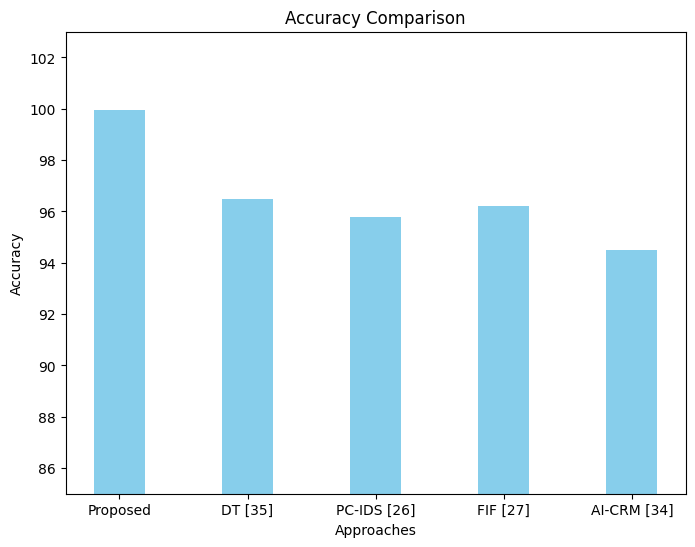

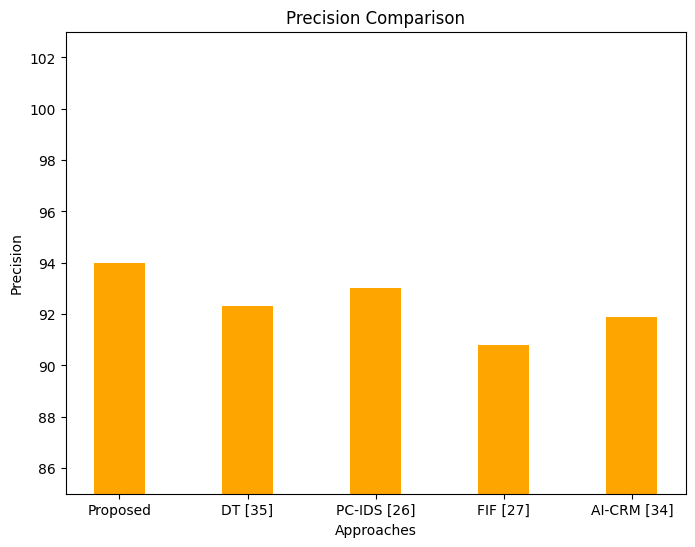

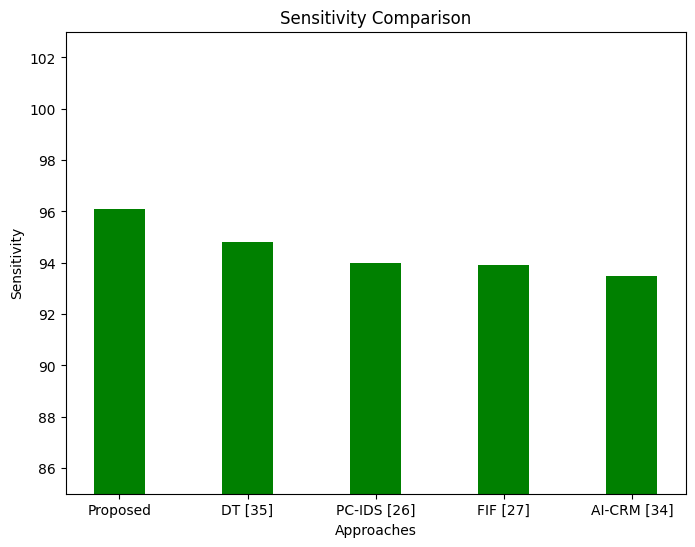

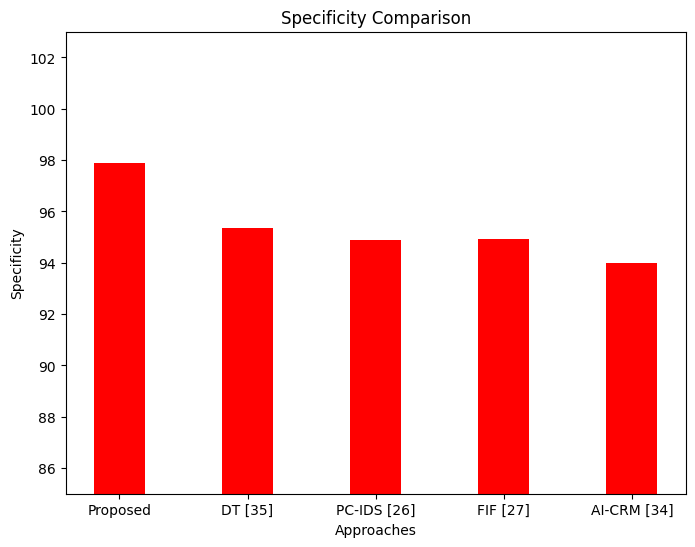

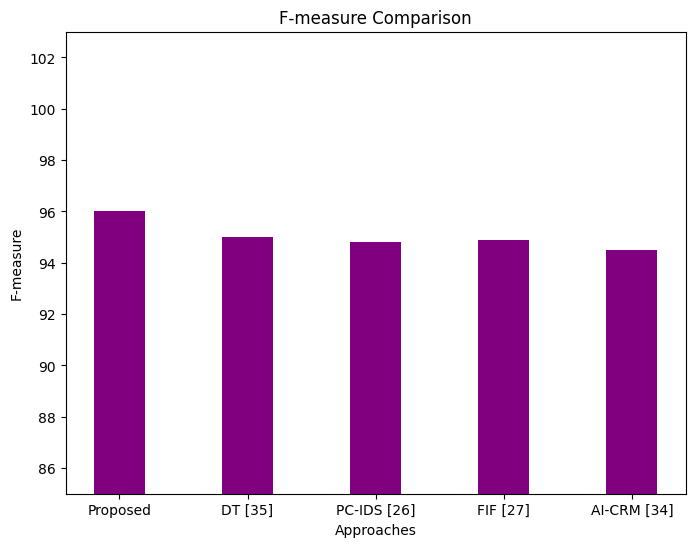

In [64]:
import matplotlib.pyplot as plt

# Approaches and their corresponding metric values
approaches = ["Proposed", "DT [35]", "PC-IDS [26]", "FIF [27]", "AI-CRM [34]"]
accuracy = [99.95, 96.5, 95.8, 96.2, 94.5]
precision = [94, 92.3, 93, 90.8, 91.9]
sensitivity = [96.1, 94.8, 94, 93.9, 93.5]
specificity = [97.9, 95.35, 94.9, 94.91, 94]
f_measure = [96, 95, 94.8, 94.9, 94.5]

# Metrics and their names
metrics = [accuracy, precision, sensitivity, specificity, f_measure]
metric_names = ["Accuracy", "Precision", "Sensitivity", "Specificity", "F-measure"]
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Display each graph one by one
for metric, name, color in zip(metrics, metric_names, colors):
    plt.figure(figsize=(8, 6))
    plt.bar(approaches, metric, color=color,width=0.4)
    plt.xlabel("Approaches")
    plt.ylabel(name)
    plt.title(f"{name} Comparison")
    plt.ylim(85, 103)  # Set Y-axis limit for better visualization
    plt.xticks(rotation=0)  # Rotate labels for better readability
    plt.show()  # Display the graph before moving to the next one



# **Encryption Decryption Graph**

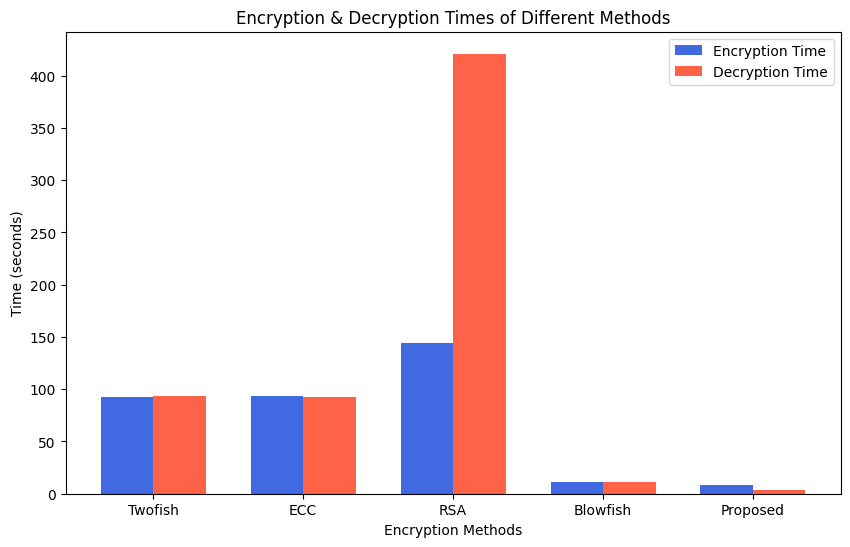

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Encryption and Decryption times (seconds)
methods = ["Twofish", "ECC", "RSA", "Blowfish", "Proposed"]
encryption_times = [92.9228, 93.8124, 144.4840, 11.1461, 7.9548]
decryption_times = [93.8124, 92.9228, 421.0843, 11.3132, 3.3725]

# Bar width
bar_width = 0.35
index = np.arange(len(methods))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index, encryption_times, bar_width, label="Encryption Time", color='royalblue')
bars2 = ax.bar(index + bar_width, decryption_times, bar_width, label="Decryption Time", color='tomato')

# Labels & Title
ax.set_xlabel("Encryption Methods")
ax.set_ylabel("Time (seconds)")
ax.set_title("Encryption & Decryption Times of Different Methods")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend()


# Show plot
plt.show()
